In [4]:
%matplotlib inline
import pandas

# Reads in the csv file
data = pandas.read_csv("data.csv", 
                   sep=";", 
                   header="infer", 
                   usecols=[" user_id", 
                            " time (ms)",
                            "event",
                            " trail_name"])
# Extracts the relevant data
#data[" user_id"] = pandas.to_numeric(data[" user_id"])
#data["movement_time (ms)"] = pandas.to_timedelta(data["ReactionTime"])
#data["movement_time (ms)"] = data["movement_time (ms)"].dt.total_seconds()
print(data)

         event    user_id   time (ms)  trail_name
0          key          1           0          IT
1          key          1           0          IT
2         word          1        1717          IT
3          key          1           0          IT
4          key          1           0          IT
5         word          1        1167          IT
6          key          1           0          IT
7          key          1           0          IT
8         word          1        1444          IT
9          key          1           0          IT
10         key          1           0          IT
11         key          1           0          IT
12        word          1        1402          IT
13         key          1           0          IT
14         key          1           0          IT
15         key          1           0          IT
16    sentence          1        9422          IT
17         key          1           0          NT
18         key          1           0          NT


### Boxplot to visualize the times (ms) of all participants

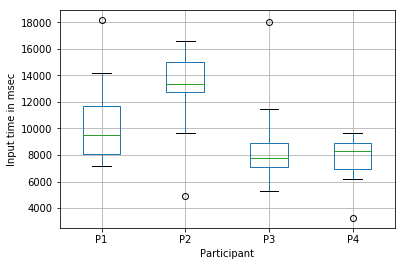

In [9]:
# Participant 1
p1 = data[(data[" user_id"] == " 1") & (data["event"] == "sentence")].reset_index()

# Participant 2
p2 = data[(data[" user_id"] == " 2") & (data["event"] == "sentence")].reset_index()

# Participant 3
p3 = data[(data[" user_id"] == " 3") & (data["event"] == "sentence")].reset_index()

# Participant 4
p4 = data[(data[" user_id"] == " 4") & (data["event"] == "sentence")].reset_index()

times_per_participant = pandas.concat([p1[' time (ms)'], 
                                       p2[' time (ms)'], 
                                       p3[' time (ms)'], 
                                       p4[' time (ms)']], 
                                      axis=1, 
                                      keys=['P1', 'P2', 'P3', 'P4'])
boxplot_tpc = times_per_participant.boxplot(column=['P1', 'P2', 'P3', 'P4'])
boxplot_tpc.set_ylabel("Input time in msec")
boxplot_tpc = boxplot_tpc.set_xlabel("Participant")

### Boxplot to visualize the times (ms) of all conditions

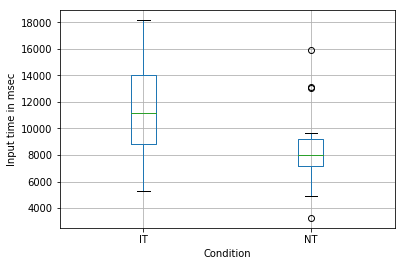

In [10]:

it = data[(data[" trail_name"] == " IT") & (data["event"] == "sentence")].reset_index()

# Pointing with low distance (PL)
nt = data[(data[" trail_name"] == " NT") & (data["event"] == "sentence")].reset_index()

times_per_condition = pandas.concat([it[' time (ms)'], 
                                     nt[' time (ms)']],
                                    axis=1, 
                                    keys=['IT', 'NT'])
boxplot_tpc = times_per_condition.boxplot(column=['IT', 'NT'])
boxplot_tpc.set_ylabel("Input time in msec")
boxplot_tpc = boxplot_tpc.set_xlabel("Condition")

### t-test it vs nt

In [11]:
from scipy.stats import ttest_rel

ttest_rel(it[' time (ms)'], nt[' time (ms)'])

Ttest_relResult(statistic=3.1640375620209156, pvalue=0.005109578048749876)